# SuppMat 2: Looking at the traits of the different model families

Tanya Strydom [](https://orcid.org/0000-0001-6067-1349)  
May 13, 2024

The purpose of this document is to provide a rationalisation but also ‘formalisation’ of the different model families of sorts. This starts of by trying to construct a ‘traits’ table and then we will feed that traits table into a hierarchical clustering model.

Understanding the rationale of the traits table is perhaps the most crucial though.

First. What the model is predicting. Is it the structure of a network, interactions between species, or their co-occurrence patterns.

Second. What does the network represent. Is it a conceptual network (*i.e.,* cannot be assigned to specific community/geographic location), metaweb (network of potential interactions), realised network, or a ‘metacommunity’ (collection of co-occurring species).

Third. What is the underlying mechanism that determines the interactions between species. This is an attempt at trying to code what is discussed in Box 1 of the main text but a bit more related to the ‘computational’ mechanism and not the ‘ecological’ mechanism. Note here that the use of mathematical is used to refer to a framework that uses some sort of mathematical formalisation to determine interactions/structure, unlike ‘statistical’ which is attempting to find and apply a pattern to determine interactions.

Fourth. What do the links represent - this is much more aligned with Box 1 in the main text

Fifth. What do the nodes represent. Note here that ‘agnostic’ means that there is no node-level metadata for the species/the information at the species level is not ecologically meaningful.

Sixth. The ecological theory as to what constrains links (again Box 1 in the main text)

Seventh. How the interactions quantified

Eight. What are the data sources needed for each model.

In [ ]:
#| include: false
#| warning: false
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
#| warning: false
#| echo: false
#| label: tbl-traits
#| tbl-cap: "Traits table for the different model families"

trait_tbl %>% 
  gt(
    rowname_col = "trait") %>% 
  sub_missing(
    missing_text = "") %>% 
  tab_spanner(
    label = "Network generators",
    columns = c(null, neutral, resource, generative)) %>% 
  tab_spanner(
    label = "Interaction predictors",
    columns = c(energetic, embedding, classifiers, matching, expert, scavenging))  %>%
  tab_row_group(
    label = "What is predicted?",
    id = "predicts",
    rows = trait_grp == "predicts"
  ) %>%
  tab_row_group(
    label = "What is the generated network representing?",
    id = "scale",
    rows = trait_grp == "scale"
  ) %>% 
  tab_row_group(
    label = "What is the underlying mechanism that determines links?",
    id = "mechanism",
    rows = trait_grp == "mechanism"
  ) %>%
  tab_row_group(
    label = "What do the links between nodes represent?",
    id = "links",
    rows = trait_grp == "links"
  ) %>%
  tab_row_group(
    label = "Is there information at the node level?",
    id = "nodes",
    rows = trait_grp == "nodes"
  ) %>%
  tab_row_group(
    label = "What type of interactions are predicted?",
    id = "interactions",
    rows = trait_grp == "interactions"
  ) %>%
  tab_row_group(
    label = "What constrains how links are determined between nodes?",
    id = "constraints",
    rows = trait_grp == "constraints"
  ) %>% 
  tab_row_group(
    label = "What data is needed to generate the network?",
    id = "data",
    rows = trait_grp %in% c("data_edge", "data_node", "data_meta", "data_network")
  ) %>% 
  row_group_order(
    groups = c("predicts", "scale", "mechanism", "links", "nodes", "constraints", 
      "interactions", "data"))  %>% 
  tab_style(
    style = cell_text(weight = "bold"),
    locations = cells_row_groups()) %>% 
  tab_style(
    style = cell_fill(color = "bisque"),
    locations = cells_row_groups()) %>% 
  cols_hide(columns = trait_grp) %>% 
  cols_align(
    align = "center",
    columns = everything()) %>% 
  opt_row_striping(row_striping = FALSE)

Maybe we try some ordination based on this traits table?

In [ ]:
# transpose
 df <- as.data.frame(t(trait_tbl[,-c(1,2)]))
 colnames(df) <- pull(trait_tbl, trait)
 rownames(df) <- names(trait_tbl)[-c(1,2)]

# make all NAs 0...
 df[is.na(df)] <- 0

# pca
pca <- prcomp(df)


# Fitting Hierarchical clustering Model
set.seed(66)  # Setting seed
hc <- hclust(dist(df), method = "ave")
hcdata <- dendro_data(hc, type = "rectangle")

new cell code for plotting because

Warning in geom_point(aes(x = pca$x[, 1], y = pca$x[, 2], label =
rownames(pca$x), : Ignoring unknown aesthetics: label

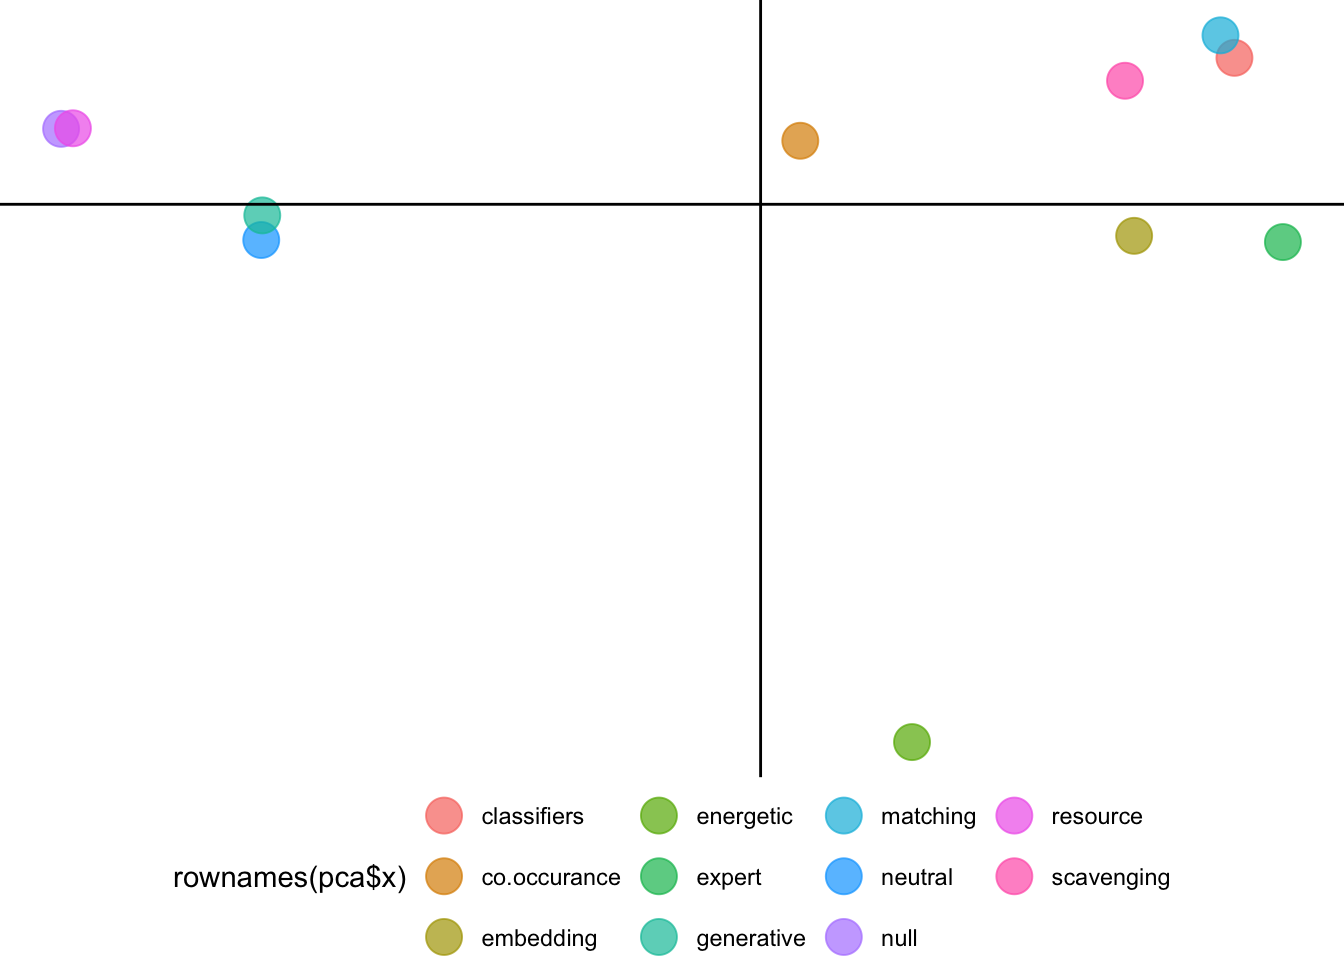

In [ ]:
#| warning: false
#| echo: false
#| label: fig-pca
#| fig-cap: "PCA of the trait table"

ggplot() +
#  geom_text(aes(x = pca$x[,1],
#                  y = pca$x[,2],
#                  label = rownames(pca$x),
#                  colour = rownames(pca$x)),
#            check_overlap = TRUE,
#            nudge_y = 0.05) +
  geom_point(aes(x = pca$x[,1],
                  y = pca$x[,2],
                  label = rownames(pca$x),
                  colour = rownames(pca$x)),
            size = 6,
            alpha = 0.7) +
  theme_void() +
  geom_hline(aes(yintercept = 0)) +
  geom_vline(aes(xintercept = 0)) +
  theme(legend.position = 'bottom')

Saving 7 x 5 in image

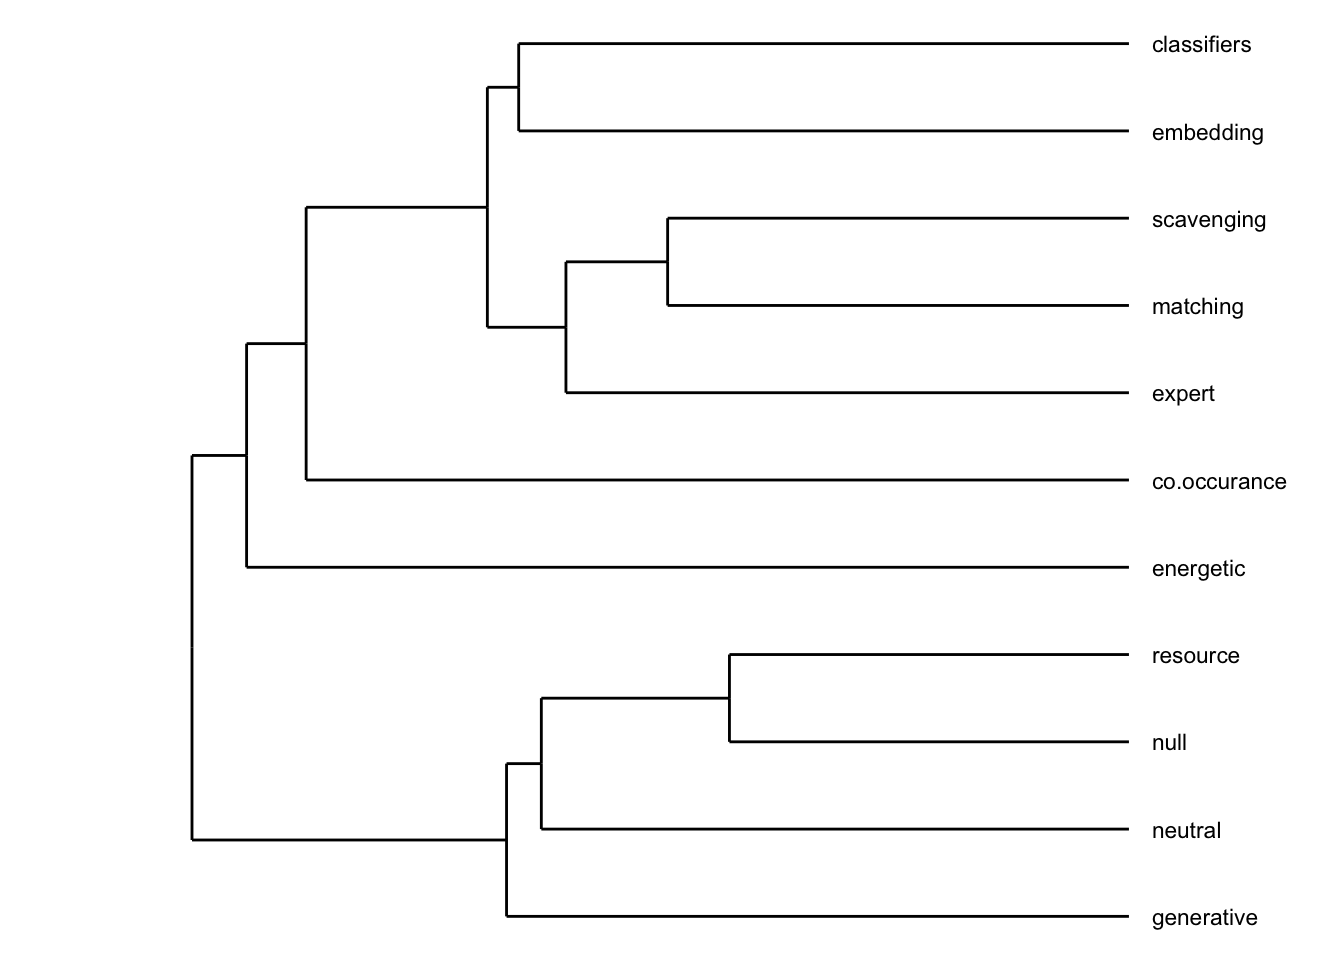

In [ ]:
#| warning: false
#| echo: false
#| label: fig-dendo
#| fig-cap: "Dendrogram of the trait table"

ggplot() +
  geom_segment(data = segment(hcdata), 
               aes(x = x, y = y, xend = xend, yend = yend)
  ) +
  geom_text(data = label(hcdata), 
            aes(x = x, y = y-0.1, label = label, hjust = 0), 
            size = 3
  ) +
  coord_flip() +
  scale_y_reverse(expand = c(0.2, 0)) +
  theme_void()

ggsave("../images/dendo.png")

## References